## Loading libraries

In [33]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from mtcnn import MTCNN
import cv2
from matplotlib import gridspec

## Loading the face detection algorithm MTCNN

In [3]:
detector = MTCNN()

Instructions for updating:
Colocations handled automatically by placer.


## Loading images

In [4]:
def extract_face(filename,detector = MTCNN(),required_size=(160, 160)):
    image = cv2.imread(filename)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    pixels = np.array(image)
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.array(image)
    return face_array

In [5]:
X = []
y = []

In [6]:
print("Number of images loaded = ",end="")
for i in range(14):
    X.append(extract_face("Desktop/Face Recognition/train/ben_afflek/ben_afflek" + str(i)+".jpg"))
    y.append("ben_afflek")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(17):
    X.append(extract_face("Desktop/Face Recognition/train/elton_john/elton_john" + str(i)+".jpg"))
    y.append("elton_john")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(21):
    X.append(extract_face("Desktop/Face Recognition/train/jerry_seinfeld/jerry_seinfeld" + str(i)+".jpg"))
    y.append("jerry_seinfeld")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(19):
    X.append(extract_face("Desktop/Face Recognition/train/madonna/madonna" + str(i)+".jpg"))
    y.append("madonna")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(22):
    X.append(extract_face("Desktop/Face Recognition/train/mindy_kaling/mindy_kaling" + str(i)+".jpg"))
    y.append("mindy_kaling")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(7):
    X.append(extract_face("Desktop/Face Recognition/train/angelina jolie/angelina jolie" + str(7)+".jpg"))
    y.append("angelina jolie")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(3):
    X.append(extract_face("Desktop/Face Recognition/train/elon musk/elon musk" + str(i)+".jpg"))
    y.append("elon musk")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(3):
    X.append(extract_face("Desktop/Face Recognition/train/george clooney/george clooney" + str(i)+".jpg"))
    y.append("george clooney")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X.append(extract_face("Desktop/Face Recognition/train/jeff bezos/jeff bezos" + str(i)+".jpg"))
    y.append("jeff bezos")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(6):
    X.append(extract_face("Desktop/Face Recognition/train/jennifer aniston/jennifer aniston" + str(i)+".jpg"))
    y.append("jennifer aniston")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(5):
    X.append(extract_face("Desktop/Face Recognition/train/katy perry/katy perry" + str(i)+".jpg"))
    y.append("katy perry")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(4):
    X.append(extract_face("Desktop/Face Recognition/train/leonardo dicaprio/leonardo dicaprio" + str(i)+".jpg"))
    y.append("leonardo dicaprio")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(5):
    X.append(extract_face("Desktop/Face Recognition/train/mark zuckerberg/mark zuckerberg" + str(i)+".jpg"))
    y.append("mark zuckerberg")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(5):
    X.append(extract_face("Desktop/Face Recognition/train/scarlet johnson/scarlet johnson" + str(i)+".jpg"))
    y.append("scarlet johnson")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X.append(extract_face("Desktop/Face Recognition/train/sundar pichai/sundar pichai" + str(i)+".jpg"))
    y.append("sundar pichai")
    print(i,end=" ")

Number of images loaded = 0 1 2 3 4 5 6 7 8 9 10 11 12 13 Number of images loaded = 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 Number of images loaded = 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 Number of images loaded = 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 Number of images loaded = 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 Number of images loaded = 0 1 2 3 4 5 6 Number of images loaded = 0 1 2 Number of images loaded = 0 1 2 Number of images loaded = 0 1 Number of images loaded = 0 1 2 3 4 5 Number of images loaded = 0 1 2 3 4 Number of images loaded = 0 1 2 3 Number of images loaded = 0 1 2 3 4 Number of images loaded = 0 1 2 3 4 Number of images loaded = 0 1 

In [7]:
X_test = []
y_test = []

In [8]:
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/ben_afflek/ben_afflek" + str(i)+".jpg"))
    y_test.append("ben_afflek")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/elton_john/elton_john" + str(i)+".jpg"))
    y_test.append("elton_john")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/train/jerry_seinfeld/jerry_seinfeld" + str(i)+".jpg"))
    y_test.append("jerry_seinfeld")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/madonna/madonna" + str(i)+".jpg"))
    y_test.append("madonna")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/mindy_kaling/mindy_kaling" + str(i)+".jpg"))
    y_test.append("mindy_kaling")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/angelina jolie/angelina jolie" + str(i)+".png"))
    y_test.append("angelina jolie")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/ellon musk/ellon musk" + str(i)+".png"))
    y_test.append("elon musk")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/george clooney/george clooney" + str(i)+".png"))
    y_test.append("george clooney")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/jeff bezos/jeff bezos" + str(i)+".png"))
    y_test.append("jeff bezos")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/jennifer aniston/jennifer aniston" + str(i)+".png"))
    y_test.append("jennifer aniston")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/katy perry/katy perry" + str(i)+".png"))
    y_test.append("katy perry")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/leonardo dicaprio/leonardo dicaprio" + str(i)+".png"))
    y_test.append("leonardo dicaprio")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/mark zuckerberg/mark zuckerberg" + str(i)+".png"))
    y_test.append("mark zuckerberg")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/scarlet johnson/scarlet johnson" + str(i)+".png"))
    y_test.append("scarlet johnson")
    print(i,end=" ")
print("Number of images loaded = ",end="")
for i in range(2):
    X_test.append(extract_face("Desktop/Face Recognition/val/sundar pichai/sundar pichai" + str(i)+".png"))
    y_test.append("sundar pichai")
    print(i,end=" ")


Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 Number of images loaded = 0 1 

In [9]:
print(len(X))
print(len(X_test))

135
30


## Processing image

In [10]:
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
np.savez_compressed('5-celebrity-faces-dataset.npz', X, y, X_test, y_test)

In [14]:
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (135, 160, 160, 3) (135,) (30, 160, 160, 3) (30,)


In [15]:
model = load_model("Desktop/facenet_keras.h5/model/facenet_keras.h5")
print('Loaded Model')

Loaded Model


/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [22]:
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    samples = np.expand_dims(face_pixels, axis=0)
    yhat = model.predict(samples)
    return yhat[0]

In [26]:
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = np.asarray(newTrainX)
print(newTrainX.shape)
newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = np.asarray(newTestX)
print(newTestX.shape)
np.savez_compressed('5-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (135, 160, 160, 3) (135,) (30, 160, 160, 3) (30,)
(135, 128)
(30, 128)


## Applying Support Vector for classification

In [28]:
data = np.load('5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=135, test=30
Accuracy: train=99.259, test=76.667


In [29]:
yhat_test

array([ 1,  1,  3,  3,  7,  7, 10, 10, 12, 12,  0,  0,  2,  1,  4,  4,  5,
        3, 10,  6, 10, 10,  9,  9, 11, 10, 13,  3, 14, 14])

In [31]:
out_encoder.fit_transform(y_test)

array([ 1,  1,  3,  3,  7,  7, 10, 10, 12, 12,  0,  0,  2,  2,  4,  4,  5,
        5,  6,  6,  8,  8,  9,  9, 11, 11, 13, 13, 14, 14])

In [55]:
ylabel_pred= out_encoder.inverse_transform(yhat_test)

## Testing Results

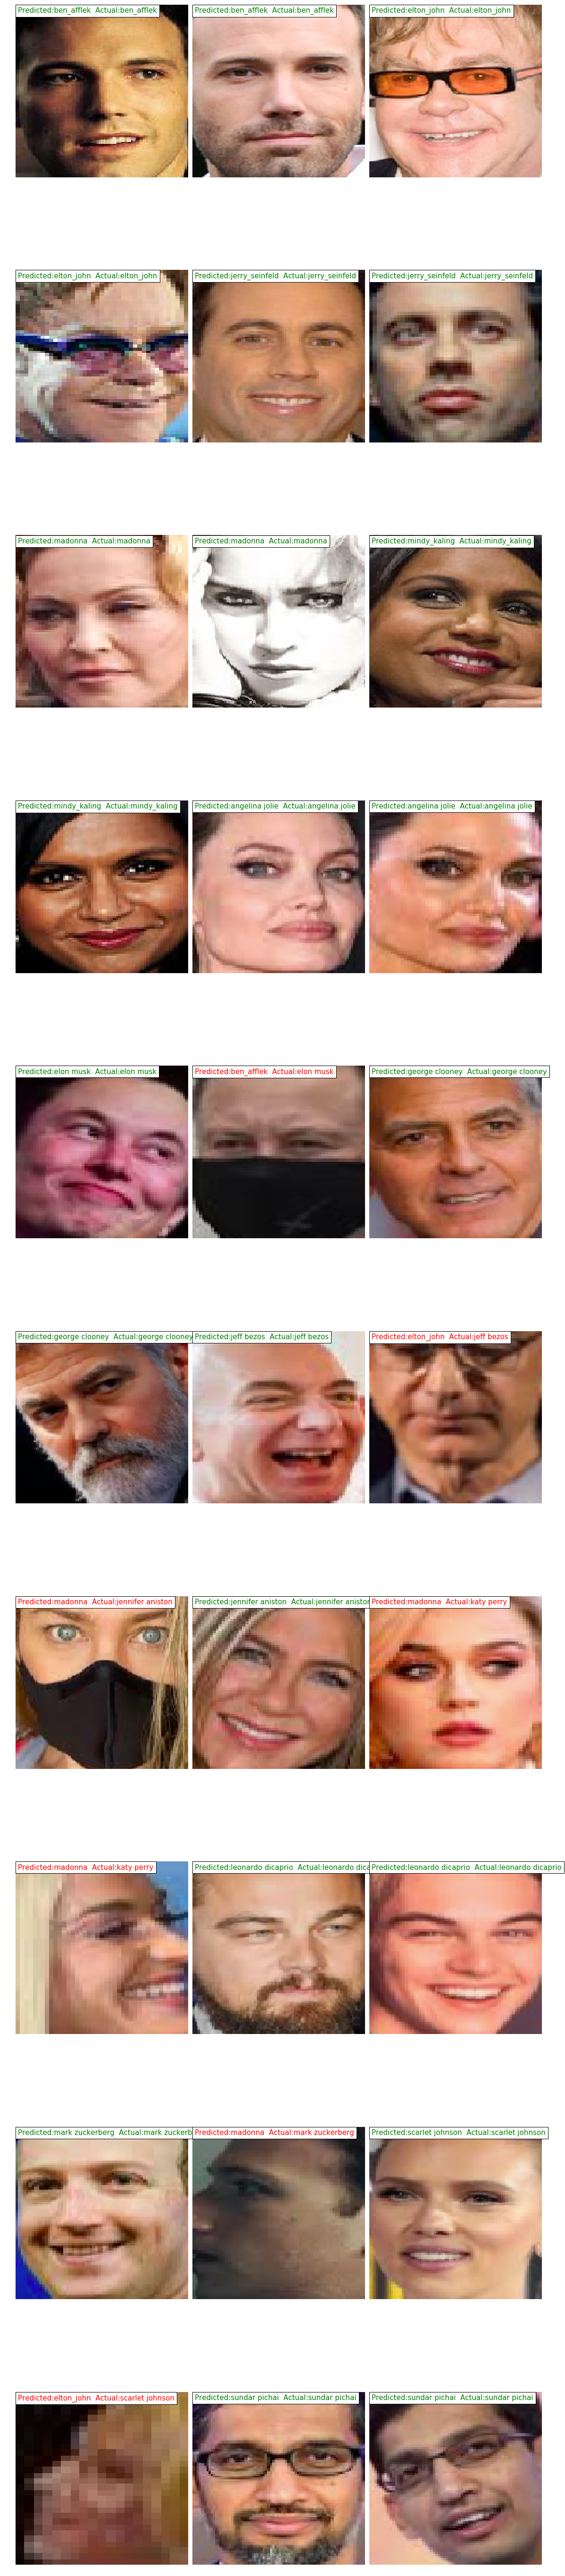

In [69]:
plt.figure(figsize = (20,100))
gs1 = gridspec.GridSpec(10, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0, 30):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.axis("off")
    ax1.annotate(
    s = 'Predicted:{0}  Actual:{1}'.format(ylabel_pred[i],y_test[i]),
    color=("green" if ylabel_pred[i] == y_test[i] else "red"),
    fontsize = 15,
    xy=(0, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='left',
    )
    ax1.imshow(X_test[i])

## Conclusion
### All possible images is present in the testing set
Total 15 classes is involved in the dataset with less number of images
* If we change the facial features then also model will classify the person.
* If mask is on then model fails to predict.
* If the persons is far from camera and the facial image is blur then the model fails to predict the person.
* If person is looking on the other direction then the person will be misclassified by the model,This will get resolved if we add some images of the same kind to the training dataset.